In [15]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import joblib


In [16]:

df_math = pd.read_csv("/kaggle/input/student-performance-uc-irvine/student/student-mat.csv", sep=';')

# Preview the first few rows
print(df_math.head())


  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]


In [17]:
df_math.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [18]:
df_math.dtype

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [19]:
df_port = pd.read_csv("/kaggle/input/student-performance-uc-irvine/student/student-por.csv", sep=';')

In [20]:
def clean_data(df):
   
    df = df.drop_duplicates()

   
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            if df[col].dtype == 'object':
                df[col] = df[col].fillna(df[col].mode()[0])  # mode for categorical
            else:
                df[col] = df[col].fillna(df[col].median())  # median for numerical


    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    for col in numeric_cols:
        q1 = df[col].quantile(0.01)
        q99 = df[col].quantile(0.99)
        df[col] = np.clip(df[col], q1, q99)

    return df


In [23]:
df_math.shape

(395, 33)

In [24]:
df_math = clean_data(df_math)
df_port = clean_data(df_port)


In [25]:

df_math_features = df_math.drop(columns=['G3'])
y_math = df_math['G3']

df_port_features = df_port.drop(columns=['G3'])
y_port = df_port['G3']


In [26]:

combined_features = pd.concat([df_math_features, df_port_features], axis=0)


In [27]:
categorical_features = combined_features.select_dtypes(include='object').columns.tolist()
numerical_features = combined_features.select_dtypes(include=['int64', 'float64']).columns.tolist()


In [28]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer


categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)
numerical_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ]
)


preprocessor.fit(combined_features)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['school', 'sex', 'address', 'famsize',
                                  'Pstatus', 'Mjob', 'Fjob', 'reason',
                                  'guardian', 'schoolsup', 'famsup', 'paid',
                                  'activities', 'nursery', 'higher', 'internet',
                                  'romantic']),
                                ('num', StandardScaler(),
                                 ['age', 'Medu', 'Fedu', 'traveltime',
                                  'studytime', 'failures', 'famrel', 'freetime',
                                  'goout', 'Dalc', 'Walc', 'health', 'absences',
                                  'G1', 'G2'])])

            feature  importance
57               G2    0.773315
55         absences    0.118444
43              age    0.013883
54           health    0.007119
49           famrel    0.006810
47        studytime    0.005787
21      reason_home    0.005043
56               G1    0.004986
25  guardian_mother    0.004575
51            goout    0.004022
50         freetime    0.003804
45             Fedu    0.003649
20    reason_course    0.003378
14     Mjob_teacher    0.002918
53             Walc    0.002901


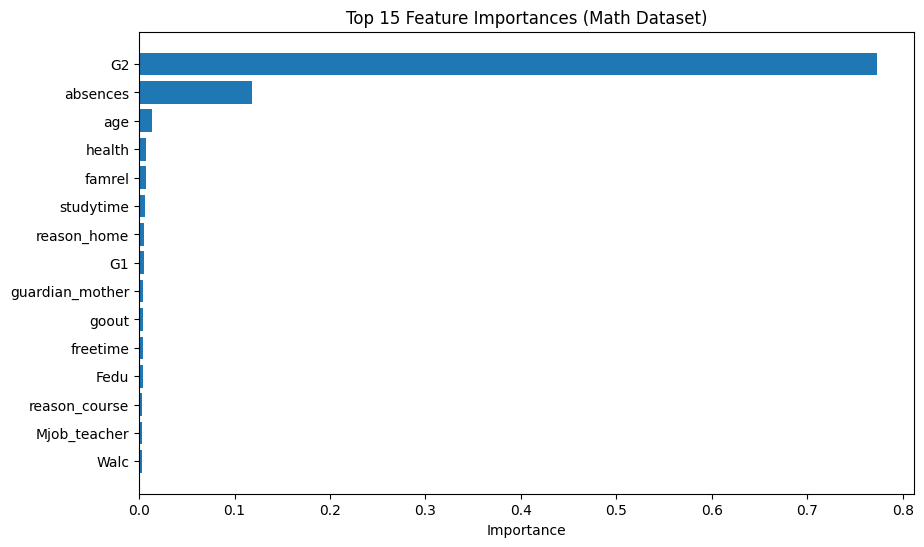

In [30]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_math, y_math)

cat_encoded = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = list(cat_encoded) + numerical_features


importances = forest.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': all_feature_names,
    'importance': importances
}).sort_values(by='importance', ascending=False)


print(feature_importance_df.head(15))


plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df.head(15)['feature'], feature_importance_df.head(15)['importance'])
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances (Math Dataset)")
plt.xlabel("Importance")
plt.show()


In [31]:
selected_features = [
    'G2',         
    'G1',         
    'failures',   
    'studytime', 
    'absences',  
    'health',   
    'internet' 
]


In [32]:
df_math_small = df_math[selected_features + ['G3']]
df_port_small = df_port[selected_features + ['G3']]


In [33]:
X_math_small = df_math_small.drop(columns=['G3'])
y_math_small = df_math_small['G3']

X_port_small = df_port_small.drop(columns=['G3'])
y_port_small = df_port_small['G3']


In [34]:
categorical_features_small = ['internet']
numerical_features_small = ['G2', 'G1', 'failures', 'studytime', 'absences', 'health']


In [35]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

preprocessor_small = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse=False), categorical_features_small),
        ('num', StandardScaler(), numerical_features_small)
    ]
)


combined_small = pd.concat([X_math_small, X_port_small], axis=0)
preprocessor_small.fit(combined_small)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['internet']),
                                ('num', StandardScaler(),
                                 ['G2', 'G1', 'failures', 'studytime',
                                  'absences', 'health'])])

In [38]:
X_math_preprocessed = preprocessor_small.transform(X_math_small)


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_math_preprocessed, y_math_small, test_size=0.2, random_state=42
)

model_small = LinearRegression()
model_small.fit(X_train, y_train)


LinearRegression()

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score


y_pred = model_small.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📘 Model Evaluation (Math Dataset):")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


📘 Model Evaluation (Math Dataset):
Mean Absolute Error: 1.33
R² Score: 0.78


In [41]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
print("🔁 Random Forest MAE:", mean_absolute_error(y_test, rf_pred))
print("🔁 Random Forest R²:", r2_score(y_test, rf_pred))


🔁 Random Forest MAE: 1.1407510548523208
🔁 Random Forest R²: 0.8283819960668479


In [42]:
import joblib

joblib.dump(model_small, "math_model.pkl")


joblib.dump(preprocessor_small, "math_preprocessor.pkl")


['math_preprocessor.pkl']

In [43]:
selected_features = [
    'G2', 'G1', 'failures', 'studytime', 'absences', 'health', 'internet'
]


In [44]:

X_port_small = df_port[selected_features]
y_port_small = df_port['G3']
X_port_preprocessed = preprocessor_small.transform(X_port_small)


In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X_port_preprocessed, y_port_small, test_size=0.2, random_state=42
)

port_model = LinearRegression()
port_model.fit(X_train_p, y_train_p)


LinearRegression()

In [46]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred_p = port_model.predict(X_test_p)

print("📘 Portuguese Model Evaluation:")
print("MAE:", mean_absolute_error(y_test_p, y_pred_p))
print("R² Score:", r2_score(y_test_p, y_pred_p))


📘 Portuguese Model Evaluation:
MAE: 0.7768629807692308
R² Score: 0.8549858278614798


In [47]:
from sklearn.ensemble import RandomForestRegressor

rf_port_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_port_model.fit(X_train_p, y_train_p)

rf_preds_p = rf_port_model.predict(X_test_p)


from sklearn.metrics import mean_absolute_error, r2_score

print("📘 Random Forest (Portuguese) Evaluation:")
print("MAE:", mean_absolute_error(y_test_p, rf_preds_p))
print("R² Score:", r2_score(y_test_p, rf_preds_p))


📘 Random Forest (Portuguese) Evaluation:
MAE: 0.7941958485958487
R² Score: 0.8405224927968339


In [48]:
import joblib


joblib.dump(port_model, "port_model.pkl")


joblib.dump(preprocessor_small, "math_preprocessor.pkl")


['math_preprocessor.pkl']